In [168]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import re

In [2]:
incidents_priv = pd.read_csv("data/source/20220413_D1_Incidents.csv", dtype=str)
incidents_rcaz = pd.read_csv("data/source/20220413_D1_Incidents_AZ.csv", dtype=str)
incidents_osha = pd.read_csv("data/source/OSHA_January2015toJuly2021.csv", dtype=str)

In [3]:
incidents_priv.head(3)

tblID    IRN IncidentNumber IncidentDate TimeofIncident BusinessUnit  \
0   175  39878       20200472   26/02/2020          14:15     Projects   
1   176  39877       20200471   26/02/2020          16:15   Consulting   
2   177  39876       20200470   27/02/2020          10:15   Operations   

                      BusinessGroup              ServiceLine  \
0          Renewable Energy & Power  Power & Industrials EPC   
1  Energy Optimisation & Innovation                     EMEA   
2                      Asia Pacific                APAC East   

                           Project                           Office  ...  \
0                   YCI M1 Project                   YCI M1 Project  ...   
1  E&II Sustainable Infrastructure  E&II Sustainable Infrastructure  ...   
2                     Esso PNG LNG                            Hides  ...   

  JFCAction OHdefinition MTCcount RWCcount LTIcount FAcount TransferTimeStamp  \
0       NaN          NaN      NaN      NaN      NaN       1               NaN   
1       NaN          NaN      NaN      NaN      NaN     NaN               NaN   
2       NaN          NaN      NaN      NaN      NaN     NaN               NaN   

        SourceFileName                                    FullDescription  \
0  CAIRS_Incidents.csv  Employee was grinding with a four-inch grinder...   
1  CAIRS_Incidents.csv                         See supporting information   
2  CAIRS_Incidents.csv  At approximately 10:15 on the 27th of Feb a hy...   

                                     ImmediateAction  
0  Employee was transported to on-site medical an...  
1  I stopped the drillers from installing, phoned...  
2  All contaminated materials, absorbent pads, we...  

[3 rows x 60 columns]

In [4]:
incidents_priv.columns

Index(['tblID', 'IRN', 'IncidentNumber', 'IncidentDate', 'TimeofIncident',
       'BusinessUnit', 'BusinessGroup', 'ServiceLine', 'Project', 'Office',
       'Country', 'IncidentType', 'IsNearMiss', 'OSHAClassification',
       'ShortDescription', 'ActualRating', 'PotentialRating',
       'IncidentAssignedTo', 'Status', 'NeedIRP', 'ContractorName',
       'WeatherConditions', 'HazardSource', 'IPOccupation', 'AgeProfile',
       'Gender', 'DaysSinceOff', 'InjuryType', 'BodyPart',
       'CauseOfInjuryIncident', 'WorkActivities', 'LSRBreached',
       'BusinessUnitID', 'BusinessGroupID', 'ServiceLineID', 'ProjectID',
       'OfficeID', 'CountryID', 'OtherIncidentAssignedTo', 'OtherInjuryType',
       'OtherCauseofInjuryIncident', 'OtherHazardSource', 'OtherLSRBreached',
       'IsWorkRelated', 'DateCreated', 'AuditDate', 'WasUpdated', 'DayofWeek',
       'CreatedTimeStamp', 'LateReporting', 'JFCAction', 'OHdefinition',
       'MTCcount', 'RWCcount', 'LTIcount', 'FAcount', 'TransferTimeSt

In [5]:
incidents_osha.head(3)

ID     UPA   EventDate  \
0  2015010015  931176  01/01/2015   
1  2015010016  930267  01/01/2015   
2  2015010018  929823  01/01/2015   

                                         Employer             Address1  \
0  FCI Otisville Federal Correctional Institution       Two Mile Drive   
1                      Kalahari Manufacturing LLC   171 Progress Drive   
2                 Schneider National Bulk Carrier  420 CORAOPOLIS ROAD   

  Address2         City         State    Zip Latitude  ... Nature  \
0      NaN    OTISVILLE      NEW YORK  10963    41.46  ...    111   
1      NaN  LAKE DELTON     WISCONSIN  53940    43.59  ...   1522   
2      NaN   CORAOPOLIS  PENNSYLVANIA  15108    40.49  ...     10   

                                     NatureTitle Part of Body  \
0                                      Fractures          513   
1             Second degree heat (thermal) burns          519   
2  Traumatic injuries and disorders, unspecified         9999   

  Part of Body Title Event                                         EventTitle  \
0       Lower leg(s)  1214  Injured by physical contact with person while ...   
1     Leg(s), n.e.c.   317              Ignition of vapors, gases, or liquids   
2    Nonclassifiable  4331         Other fall to lower level less than 6 feet   

  Source                          SourceTitle Secondary Source  \
0   5721                            Co-worker             5772   
1   7261   Welding, cutting, and blow torches              NaN   
2   8421  Semi, tractor-trailer, tanker truck              741   

          Secondary Source Title  
0  Inmate or detainee in custody  
1                            NaN  
2                  Ladders-fixed  

[3 rows x 26 columns]

In [6]:
incidents_rcaz.head(3)

tblID   IRN AZRecordID TypeID              Type CategoryID  \
0   591  8219       5165      1  Immediate Causes          7   
1   592  8219       5166      1  Immediate Causes          8   
2   593  8219       5167      2       Root Causes         24   

                           Category FactorID  \
0                     G Exposure to       55   
1  H Workplace environment / layout       58   
2                 X Risk management      206   

                                   Factor     SubCause TransferTimeStamp  \
0  G-10 Extreme weather or acts of nature   Conditions  13/04/2022 04:00   
1                   H-2 Clutter or debris   Conditions  13/04/2022 04:00   
2     X-7 Inadequate management of change  Job Factors  13/04/2022 04:00   

          SourceFileName                                            Comment  
0  CAIRS_Incident_AZ.csv  Exposure to air borne particle( via gust of wi...  
1  CAIRS_Incident_AZ.csv  Excessive rust particles/debris on corroded li...  
2  CAIRS_Incident_AZ.csv  Failure to identify excessive rust particles u...

In [7]:
incidents_rcaz.Category.unique()

array(['G Exposure to', 'H Workplace environment / layout',
       'X Risk management',
       'A Procedures, e.g. PTW, method statements, etc.',
       'V Standards & processes', 'D Human action', 'T Materials',
       'F Tools, equipment and vehicles', 'U Work equipment',
       'M Behaviour', 'S Planning', 'Y Learning from experience',
       'W Communication', 'R Engineering/Design/Commissioning',
       'B Use of tools, equipment or materials', 'N Skill level',
       'O Competence/training/knowledge transfer',
       'C Use of protective methods', 'E Protective systems',
       'Q Contractor selection and engagement', 'J Physical condition',
       'P Safety leadership', 'I Physical capability',
       'Z Monitor & review', 'L Mental stress', 'K Mental capability'],
      dtype=object)

In [8]:
incidents_rcaz.Factor.unique()

array(['G-10 Extreme weather or acts of nature', 'H-2 Clutter or debris',
       'X-7 Inadequate management of change',
       'A-5 Procedure not understood', 'V-1 Lack of S&P for the task',
       'D-2 Mistake', 'T-6 Improper handling of materials',
       'F-1 Defective equipment',
       'U-7 Inadequate information on maintenance',
       'A-2 Non-application by group',
       'D-3 Failure to appreciate the risk', 'G-8 Mechanical hazards',
       'M-4 Inadequate reinforcement of safe behaviour',
       'S-8 Inadequate planning documentation or implementation',
       'X-1 Inadequate hazard identification',
       'X-3 Inadequate identification of controls', 'D-7 Other',
       'X-6 Inappropriate use of generic risk assessments',
       'Y-1 Failure to capture previous learning',
       'D-1 Slip or lapse of attention', 'M-10 Other',
       'W-1 Inadequate comms in work team',
       'H-1 Congestion or restricted motion', 'R-12 Other', 'B-5 Other',
       'N-1 Inadequate definition o

In [25]:
incidents_rcaz_comp = incidents_rcaz[incidents_rcaz.Category == 'O Competence/training/knowledge transfer']
incidents_comp = pd.merge(incidents_rcaz_comp, incidents_priv, on='IRN', how='left')

In [47]:
incidents_comp
display(HTML(incidents_comp.filter(items=['IRN', 'Factor', 'ShortDescription', 'FullDescription']).to_html()))

### Data Visualization

In [111]:
# Pick a minority category of interest
focus_cats = [
    'hydraulic fluid or oil leak',
    'dropped object or material'
]

fns = [
    'output/hydraulic fluid or oil leak_577_out_df_temp.csv',
    'output/dropped object or material_5,203_out_df_temp.csv'
]

plot_tags = ['Hydraulic', 'DroppedObject']

### Document Count Distribution

In [304]:
select_ind = 1
focus_cat = focus_cats[select_ind]
fn = fns[select_ind]
plot_tag = plot_tags[select_ind]

df = pd.read_csv(fn)
df = df[['text', 'category', 'dset']]

# Convert category to binary 1/0
# Remeber that 1 is a rule-book hit & not necessarily the 'truth'
df['category'] = df['category'].apply(lambda x : x.replace("*** Not Classified", "0"))
df['category'] = df['category'].apply(lambda x : x.replace(focus_cat, "1"))
df['category'] = df['category'].astype(int)

In [305]:
df

text  category  dset
0      foreign body entered employee's (l) eye while ...         0  ORGP
1      drainage pipe damaged at ~2.2 m depth. see sup...         0  ORGP
2      robodrill spider excavator being operated when...         0  ORGP
3      pressure hose made contact with light fitting ...         0  ORGP
4      nacap 30t hitachi hyd hose split resultong in ...         0  ORGP
...                                                  ...       ...   ...
93852  fall on water vehicle an employee was using an...         0  OSHA
93853  other fall to lower level, unspecified an empl...         0  OSHA
93854  injured by slipping or swinging object held by...         0  OSHA
93855  direct exposure to electricity, greater than 2...         0  OSHA
93856  hitting, kicking, beating, shoving a nurse was...         0  OSHA

[93857 rows x 3 columns]

In [306]:
doc_lens = [len(d) for d in df.text]
doc_lens_o = [len(d) for d in df[df.dset=='OSHA'].text]
doc_lens_w = [len(d) for d in df[df.dset=='ORGP'].text]

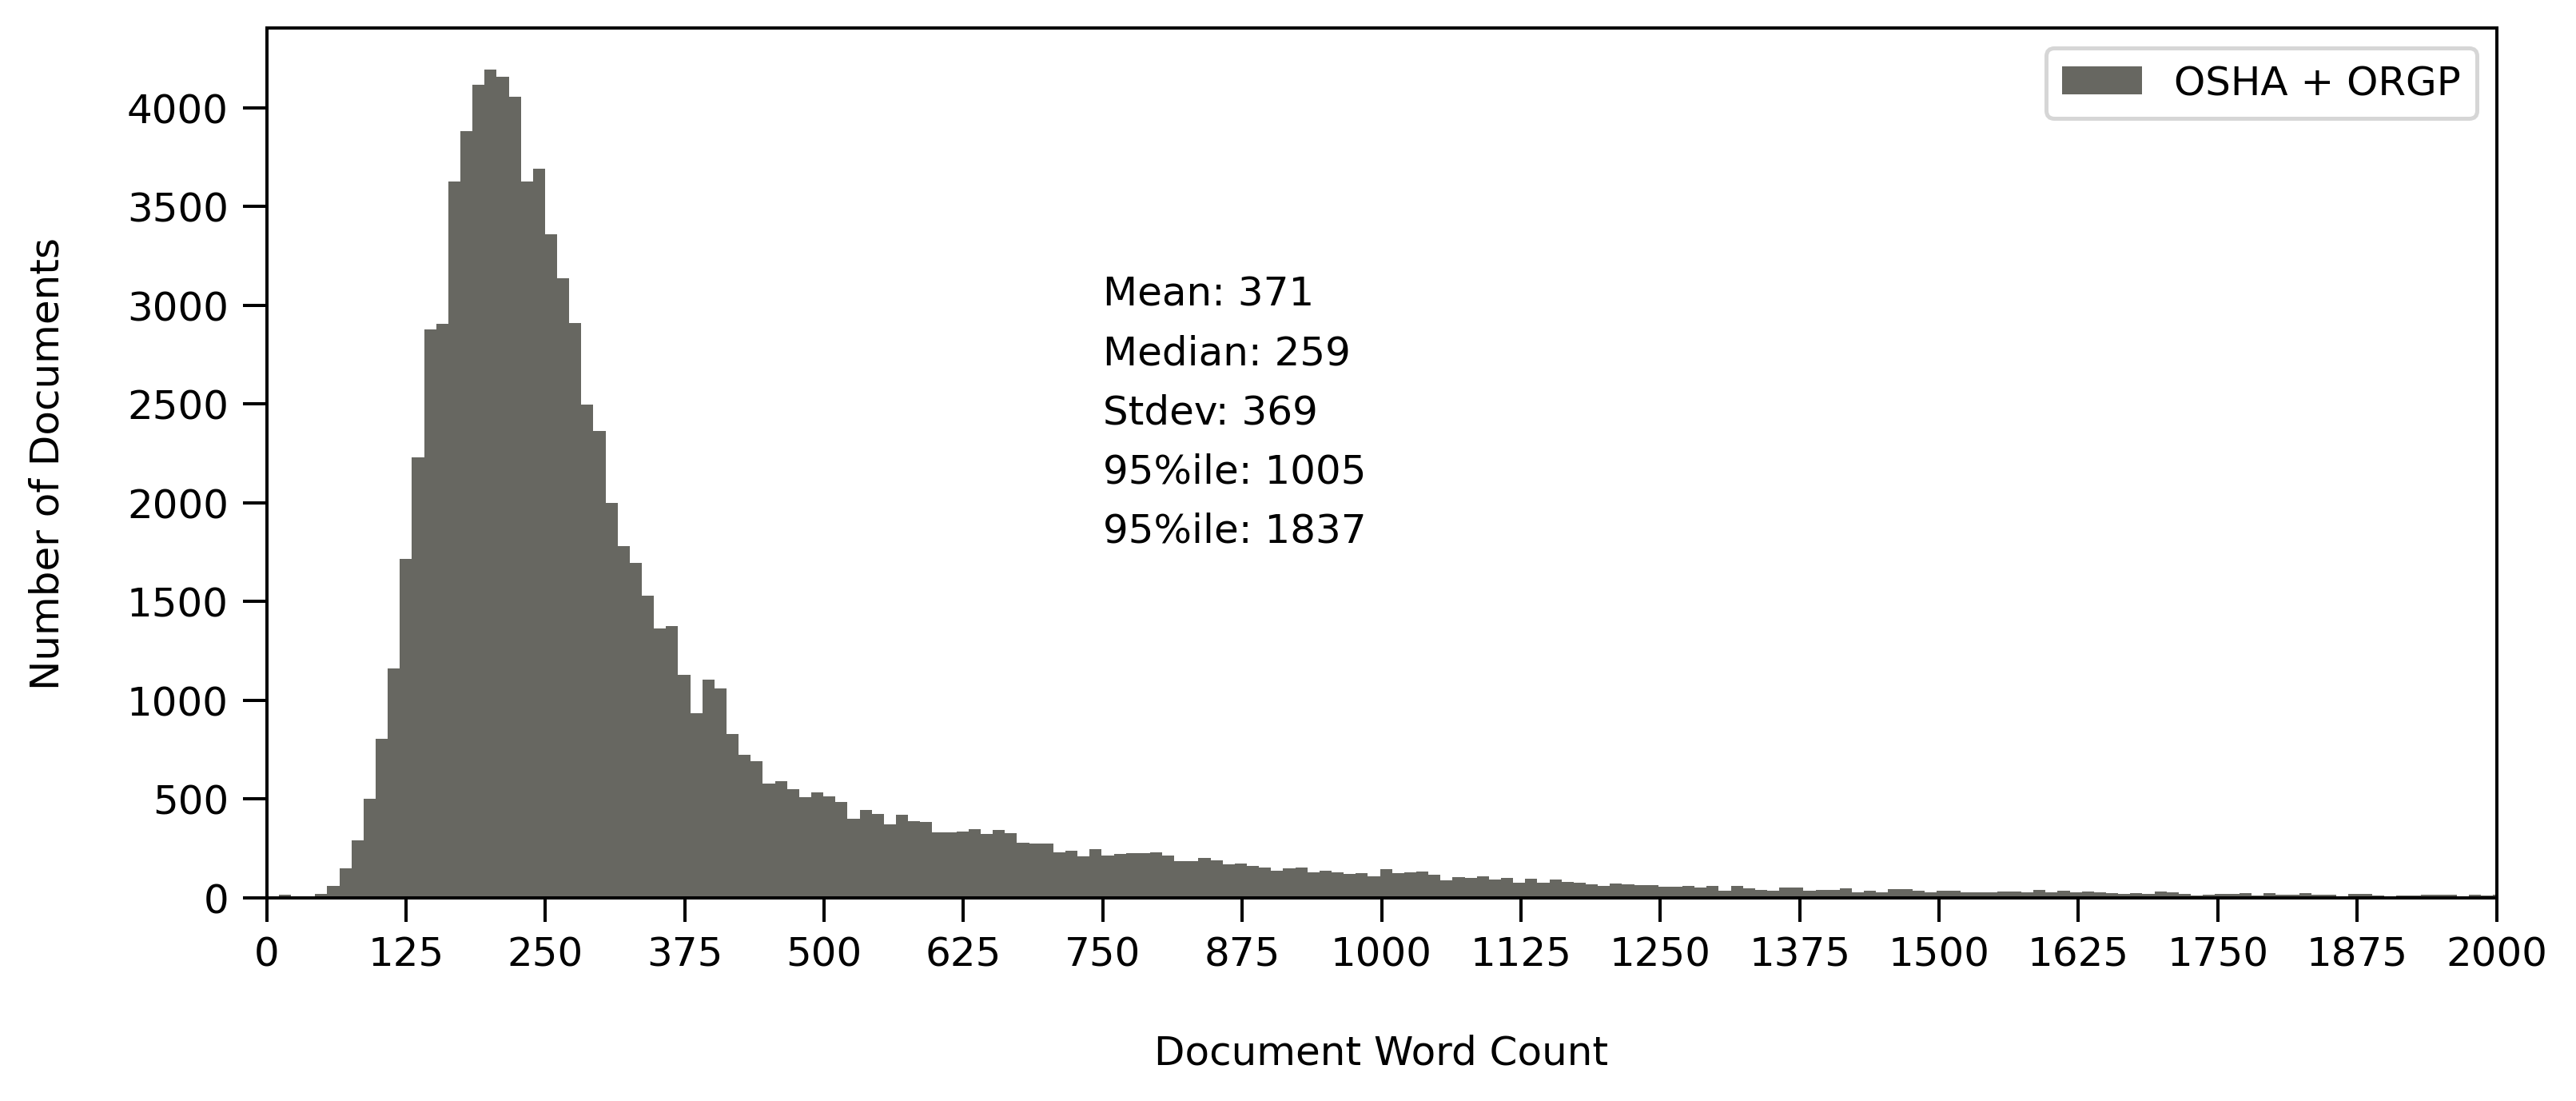

In [335]:
# Plot
plt.figure(figsize=(10, 4), dpi=360)
plt.hist(doc_lens, bins = 1000, color='#26261e', alpha=0.7, label = 'OSHA + ORGP')
plt.text(750, 3000, "Mean: " + str(round(np.mean(doc_lens))))
plt.text(750, 2700, "Median: " + str(round(np.median(doc_lens))))
plt.text(750, 2400, "Stdev: " + str(round(np.std(doc_lens))))
plt.text(750, 2100, "95%ile: " + str(round(np.quantile(doc_lens, q=0.95))))
plt.text(750, 1800, "95%ile: " + str(round(np.quantile(doc_lens, q=0.99))))
plt.legend(loc = 'upper right')

plt.gca().set(xlim=(0, 2000))
plt.xlabel("Document Word Count", labelpad = 15)
plt.ylabel("Number of Documents", labelpad = 15)
plt.tick_params(size=6)
plt.xticks(np.linspace(0, 2000, 17))
plt.title('', fontdict=dict(size=10))
plt.savefig('plots/wordsPerDoc.png', bbox_inches='tight', dpi=600)
plt.show()

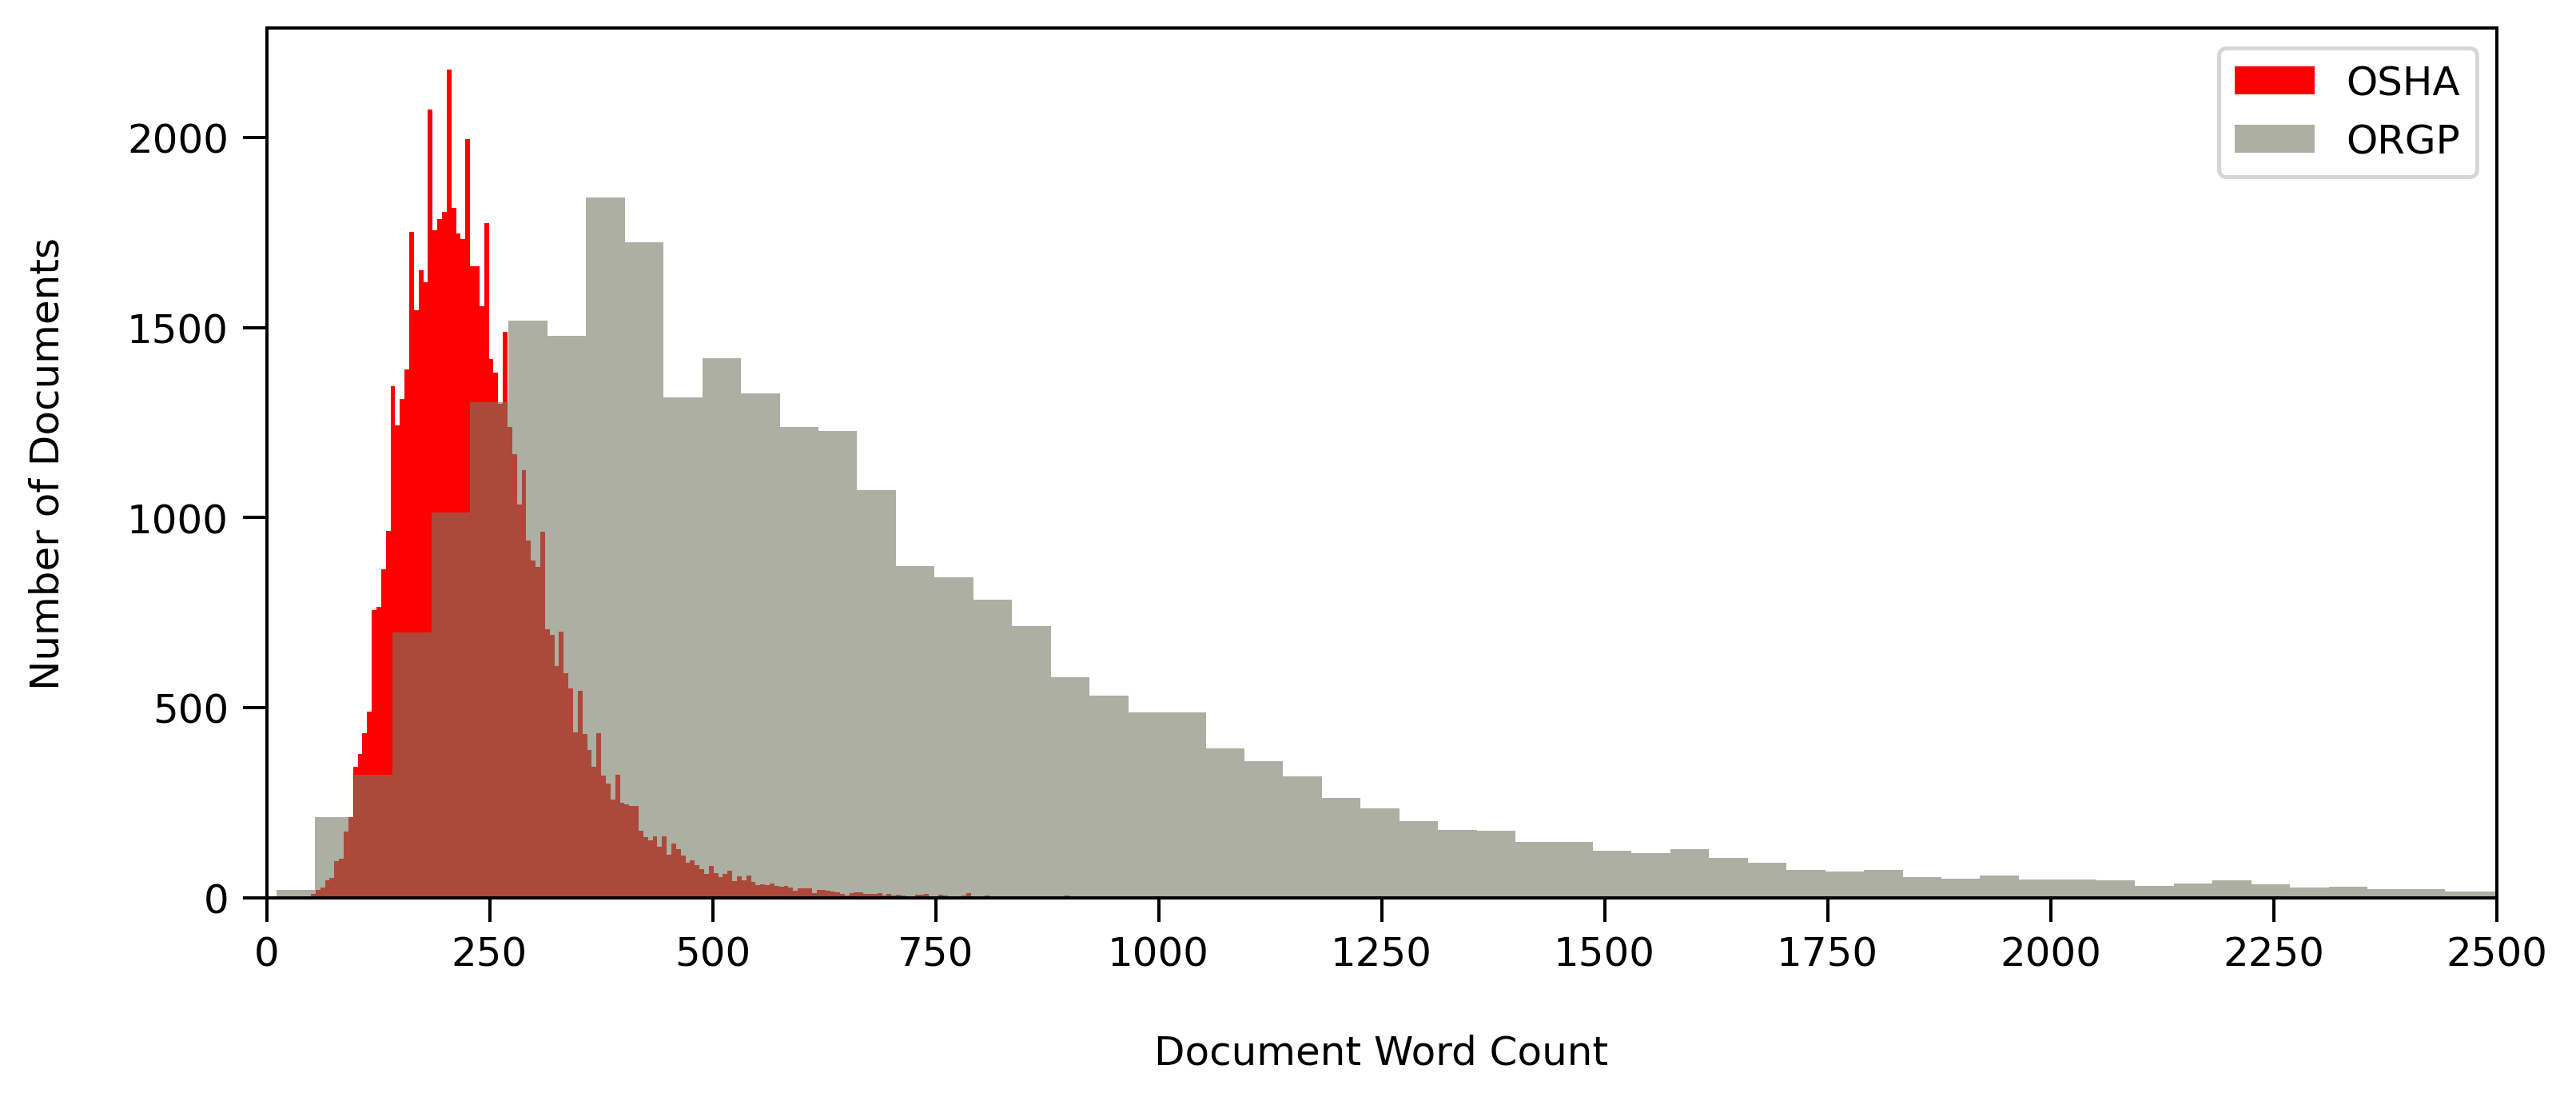

In [437]:
# Plot
plt.figure(figsize=(10, 4), dpi=360)
plt.hist(doc_lens_o, bins = 250, color='red', label = 'OSHA')
plt.hist(doc_lens_w, bins = 250, color='#767b63', alpha=0.6, label = 'ORGP')
plt.xlabel("Cost (1000 Eur)")
plt.ylabel("Probabilty Density")
plt.title(f'Empirical Distribution Fitted to 7-turbine Data')
plt.legend(loc = 'upper right')

plt.gca().set(xlim=(0, 2500))
plt.xlabel("Document Word Count", labelpad = 15)
plt.ylabel("Number of Documents", labelpad = 15)
plt.tick_params(size=6)
plt.xticks(np.linspace(0, 2500, 11))
plt.title('', fontdict=dict(size=11))
plt.savefig('plots/wordsPerDocOrg.png', bbox_inches='tight', dpi=600)
plt.show()

### Example Wordclouds

In [118]:
# Import package
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [119]:
# Custom stop words
extra_stops = ['legacy', 'migrated', 'cairs']
for w in extra_stops:
    STOPWORDS.add(w)

In [120]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");


Hydraulic:

DroppedObject:


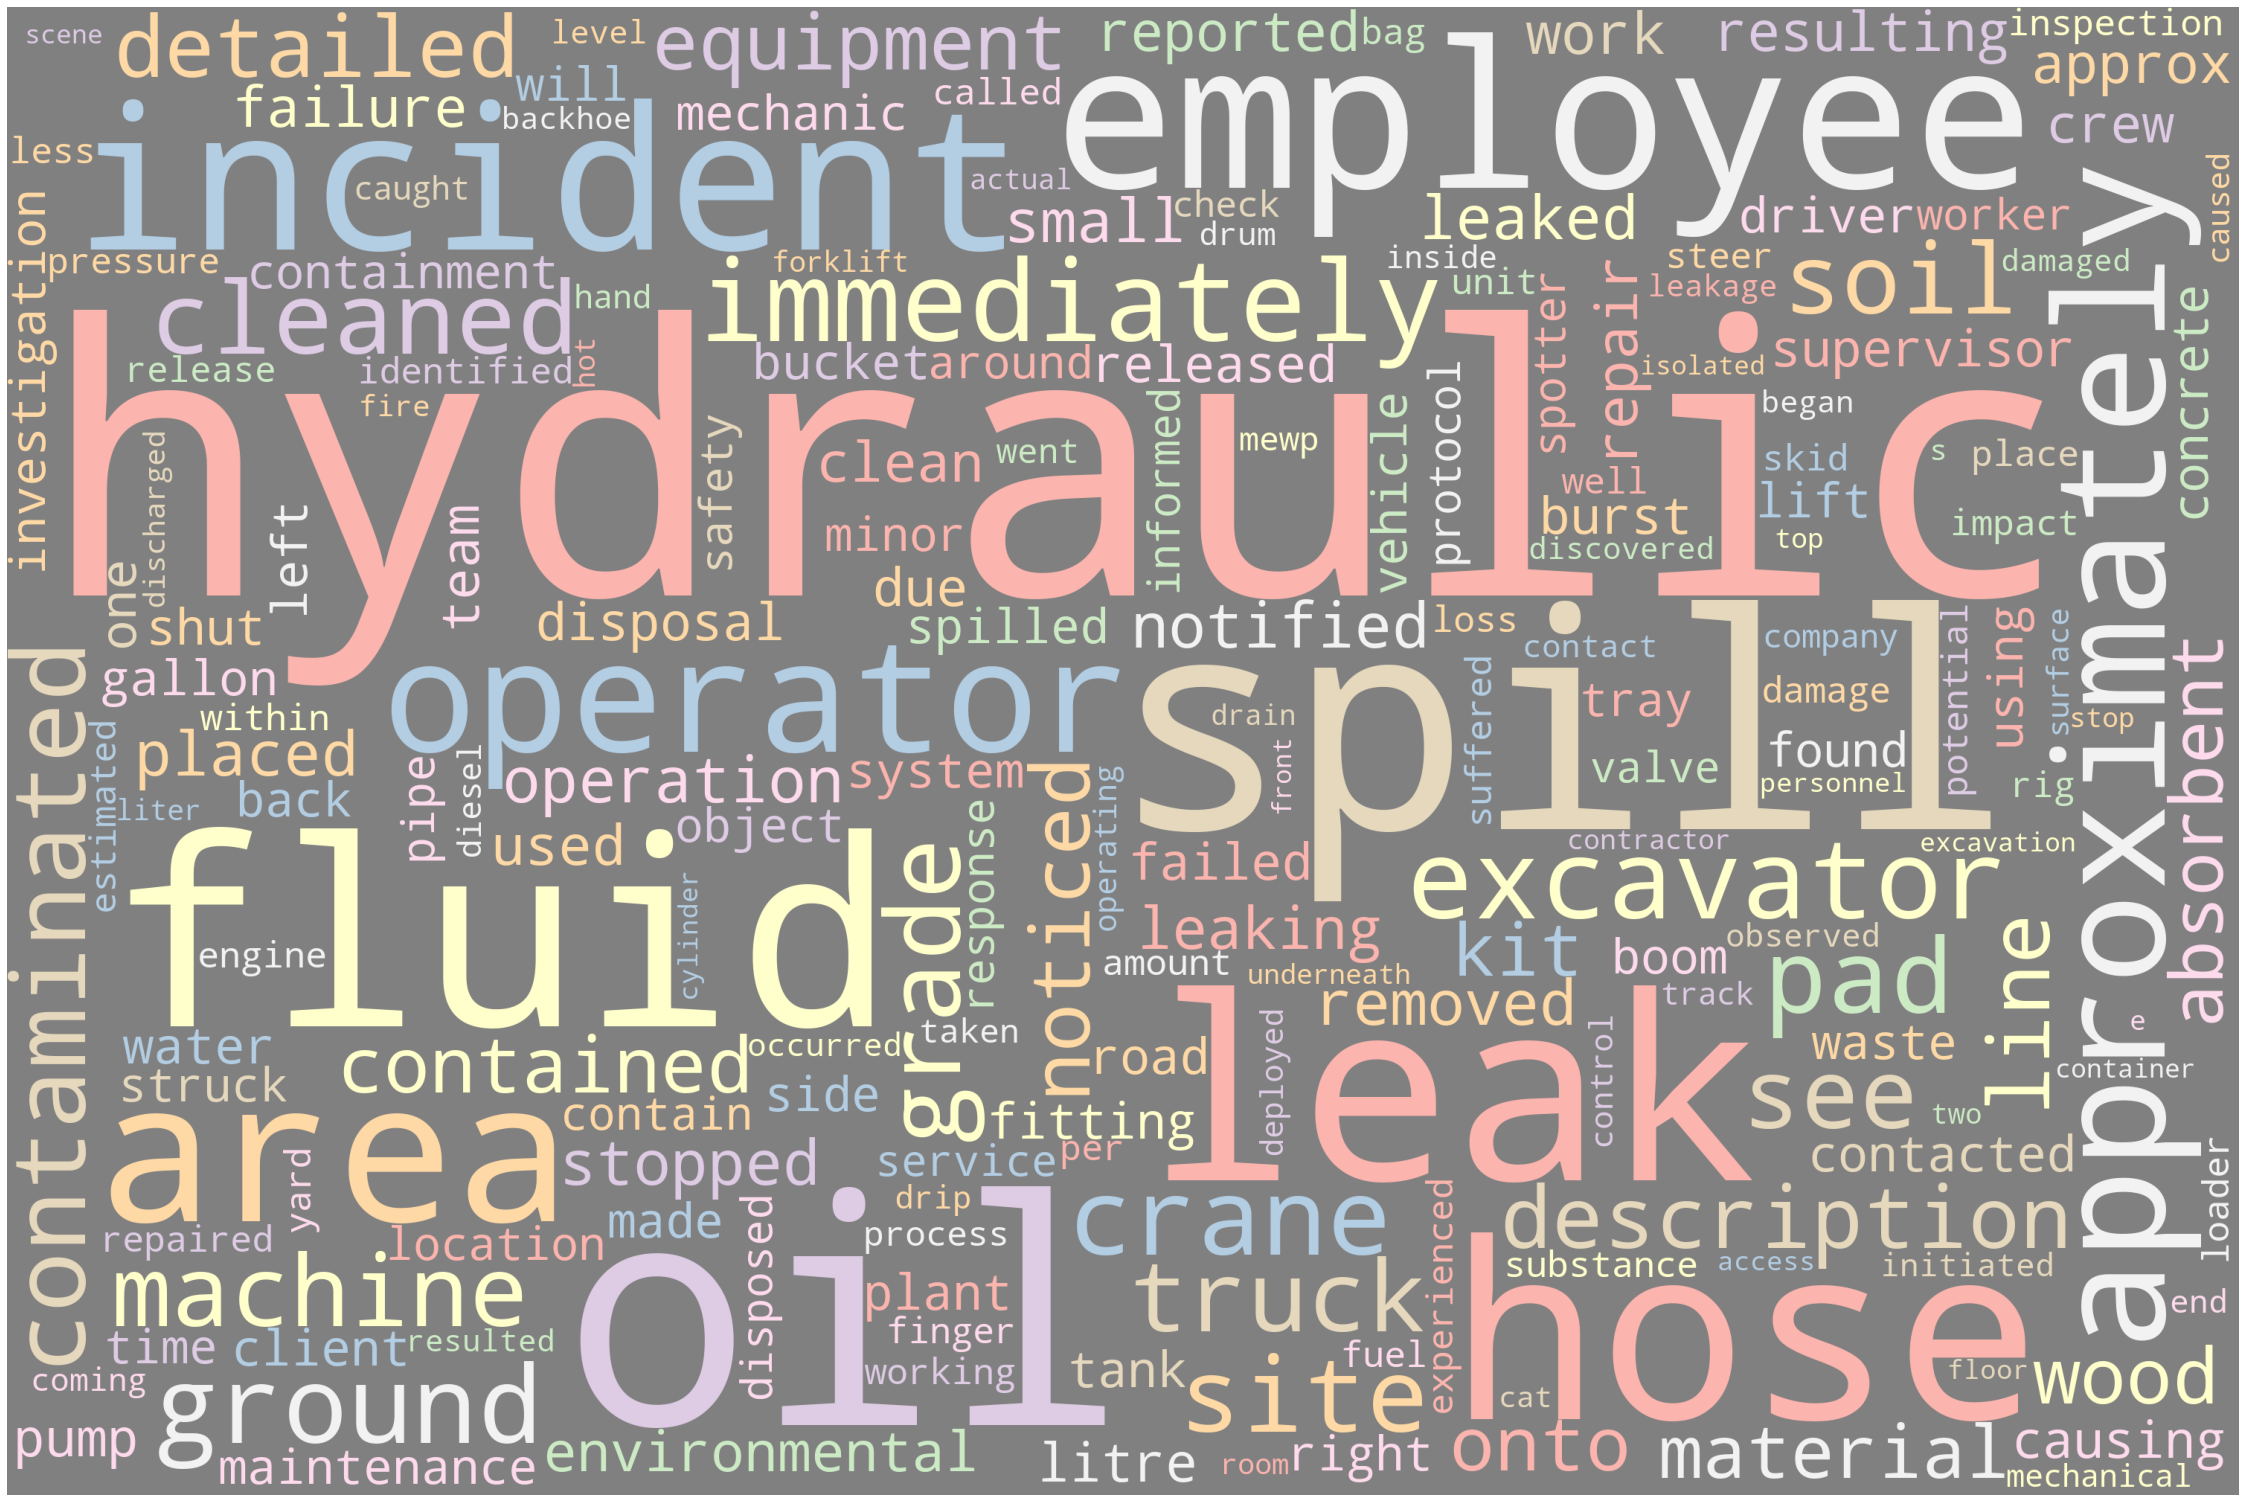

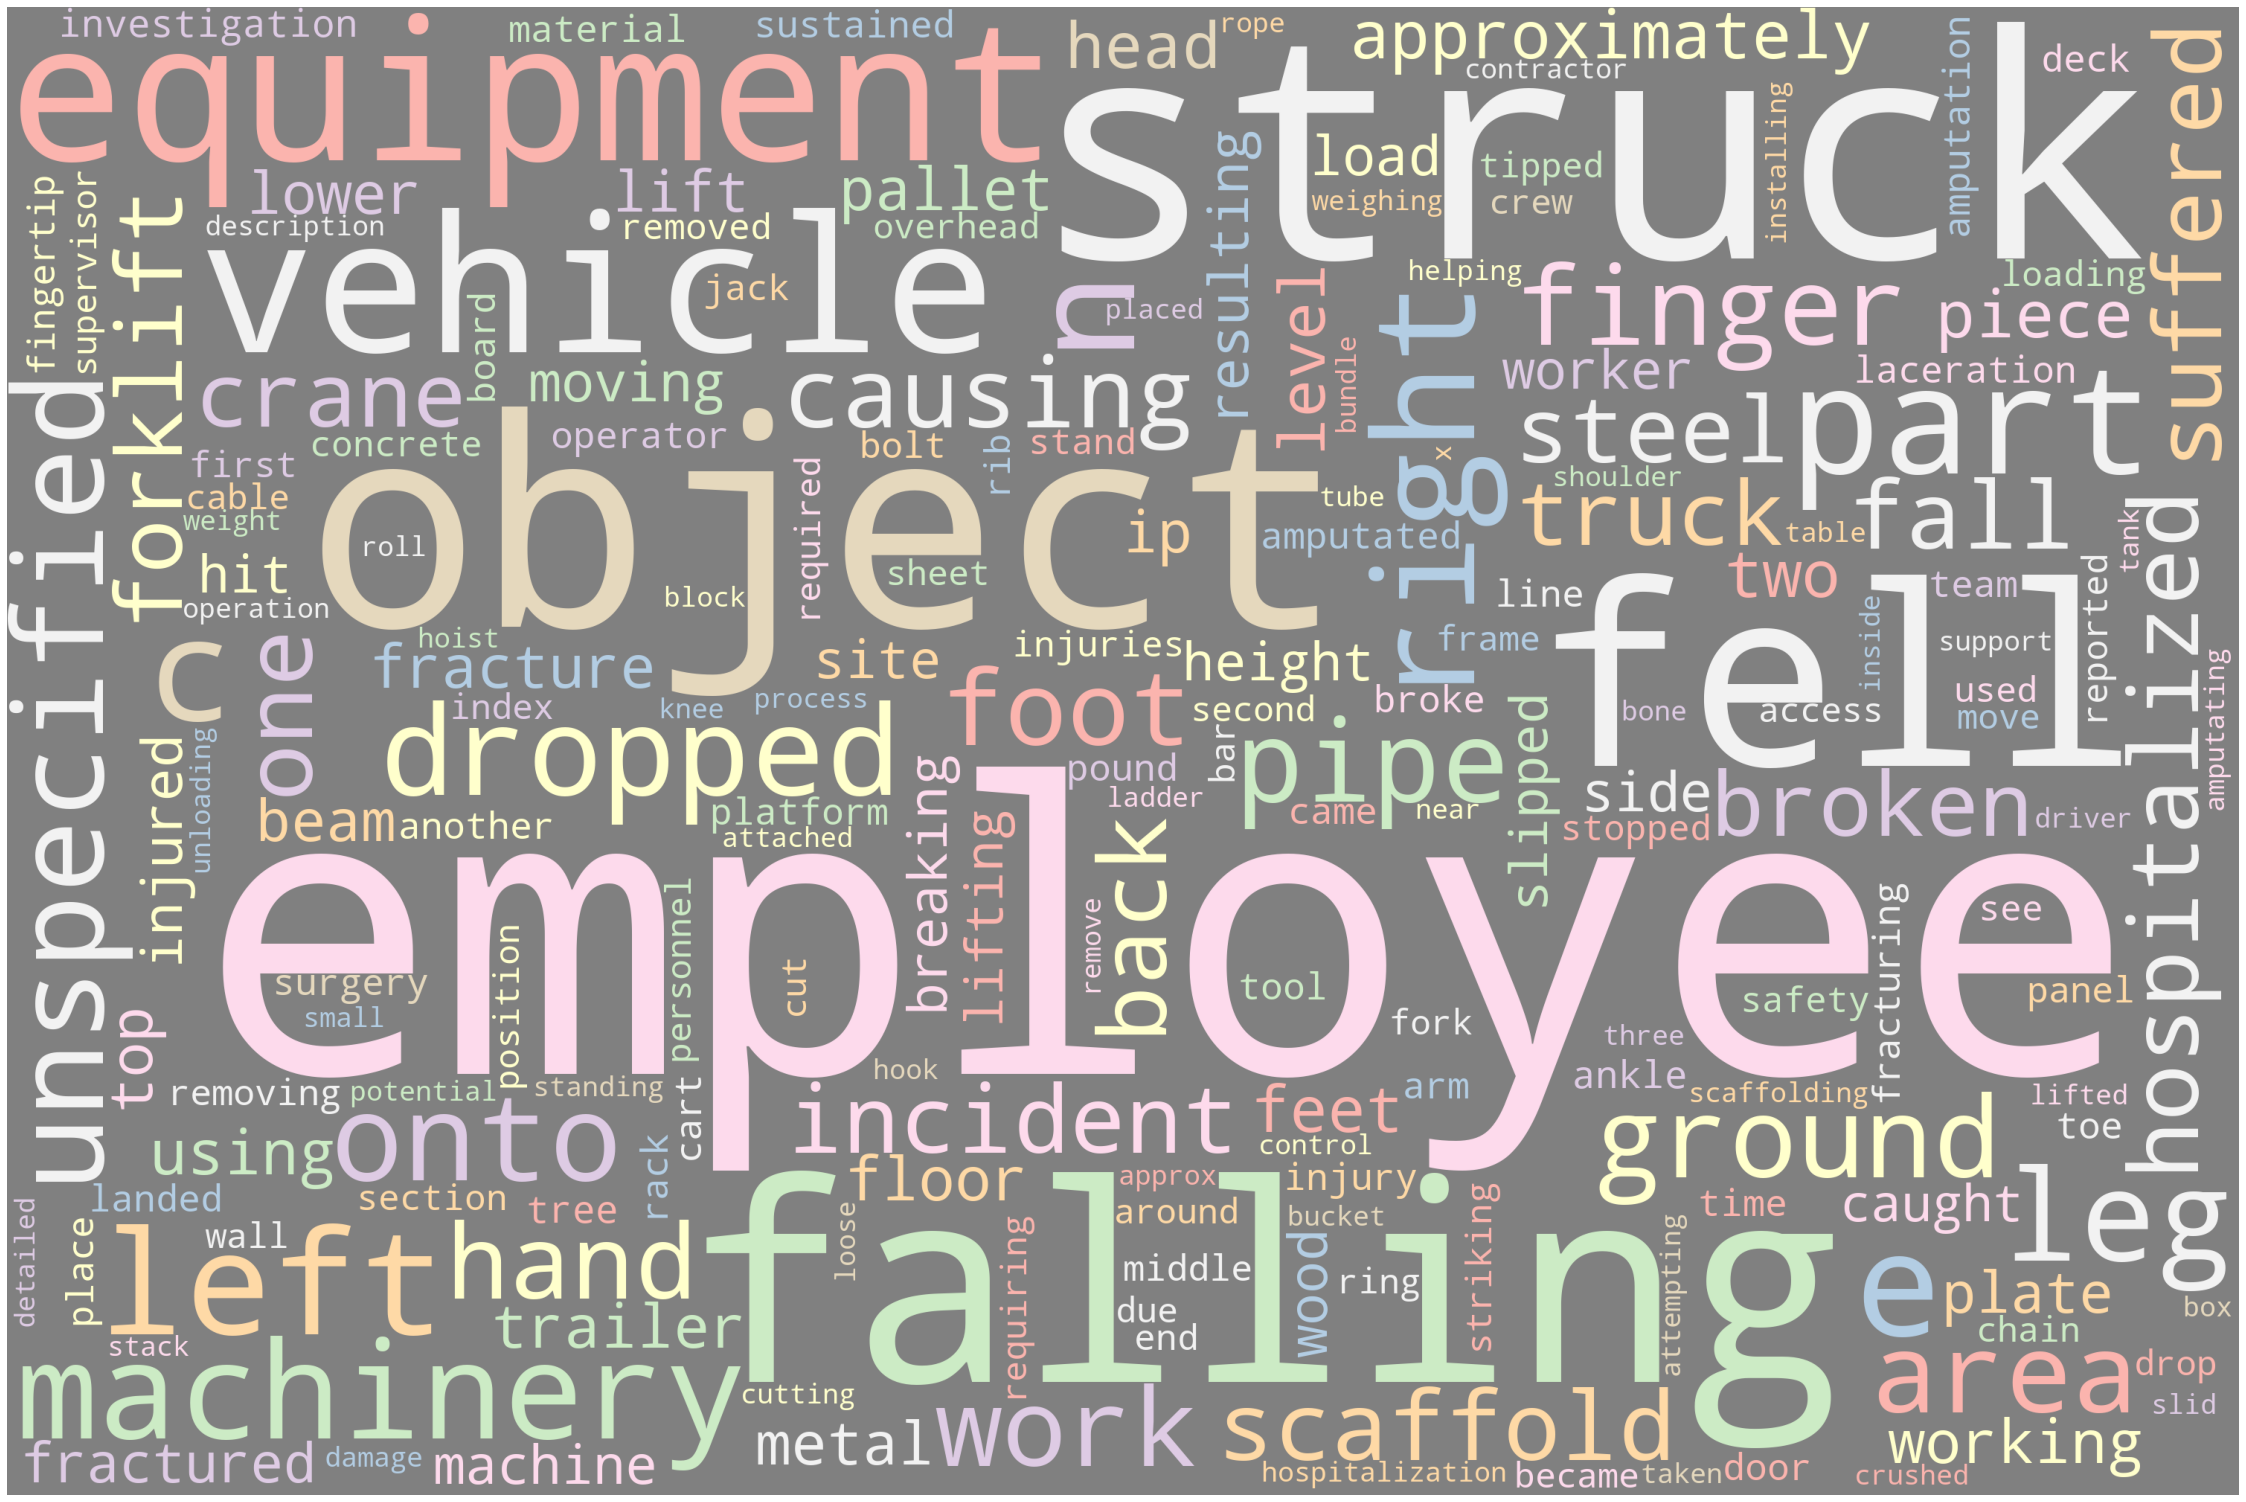

In [123]:
for i, tag in enumerate(plot_tags):    
    focus_cat = focus_cats[i]
    fn = fns[i]
    plot_tag = tag

    df = pd.read_csv(fn)
    df = df[['text', 'category']]

    # Convert category to binary 1/0
    # Remeber that 1 is a rule-book hit & not necessarily the 'truth'
    df['category'] = df['category'].apply(lambda x : x.replace("*** Not Classified", "0"))
    df['category'] = df['category'].apply(lambda x : x.replace(focus_cat, "1"))
    df['category'] = df['category'].astype(int)

    text = df[df['category'] == 1].text
    text = ' '.join([x for x in text])
    
    
    # Generate word cloud
    wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='gray', 
                          colormap='Pastel1', collocations=False, 
                          stopwords = STOPWORDS).generate(text)
    # Plot
    print(f'\n{tag}:')
    plot_cloud(wordcloud)
    wordcloud.to_file(f'plots/wc{plot_tag}.png')

In [392]:
coverages = [85, 89, 90, 86, 83, 86, 92, 92, 91, 95, 94, 88, 90, 93, 86, 89, 88, 88, 88, 86, 89, 88, 93, 88, 83, 86, 87, 82, 91, 91]

In [394]:
#coverages.sort()

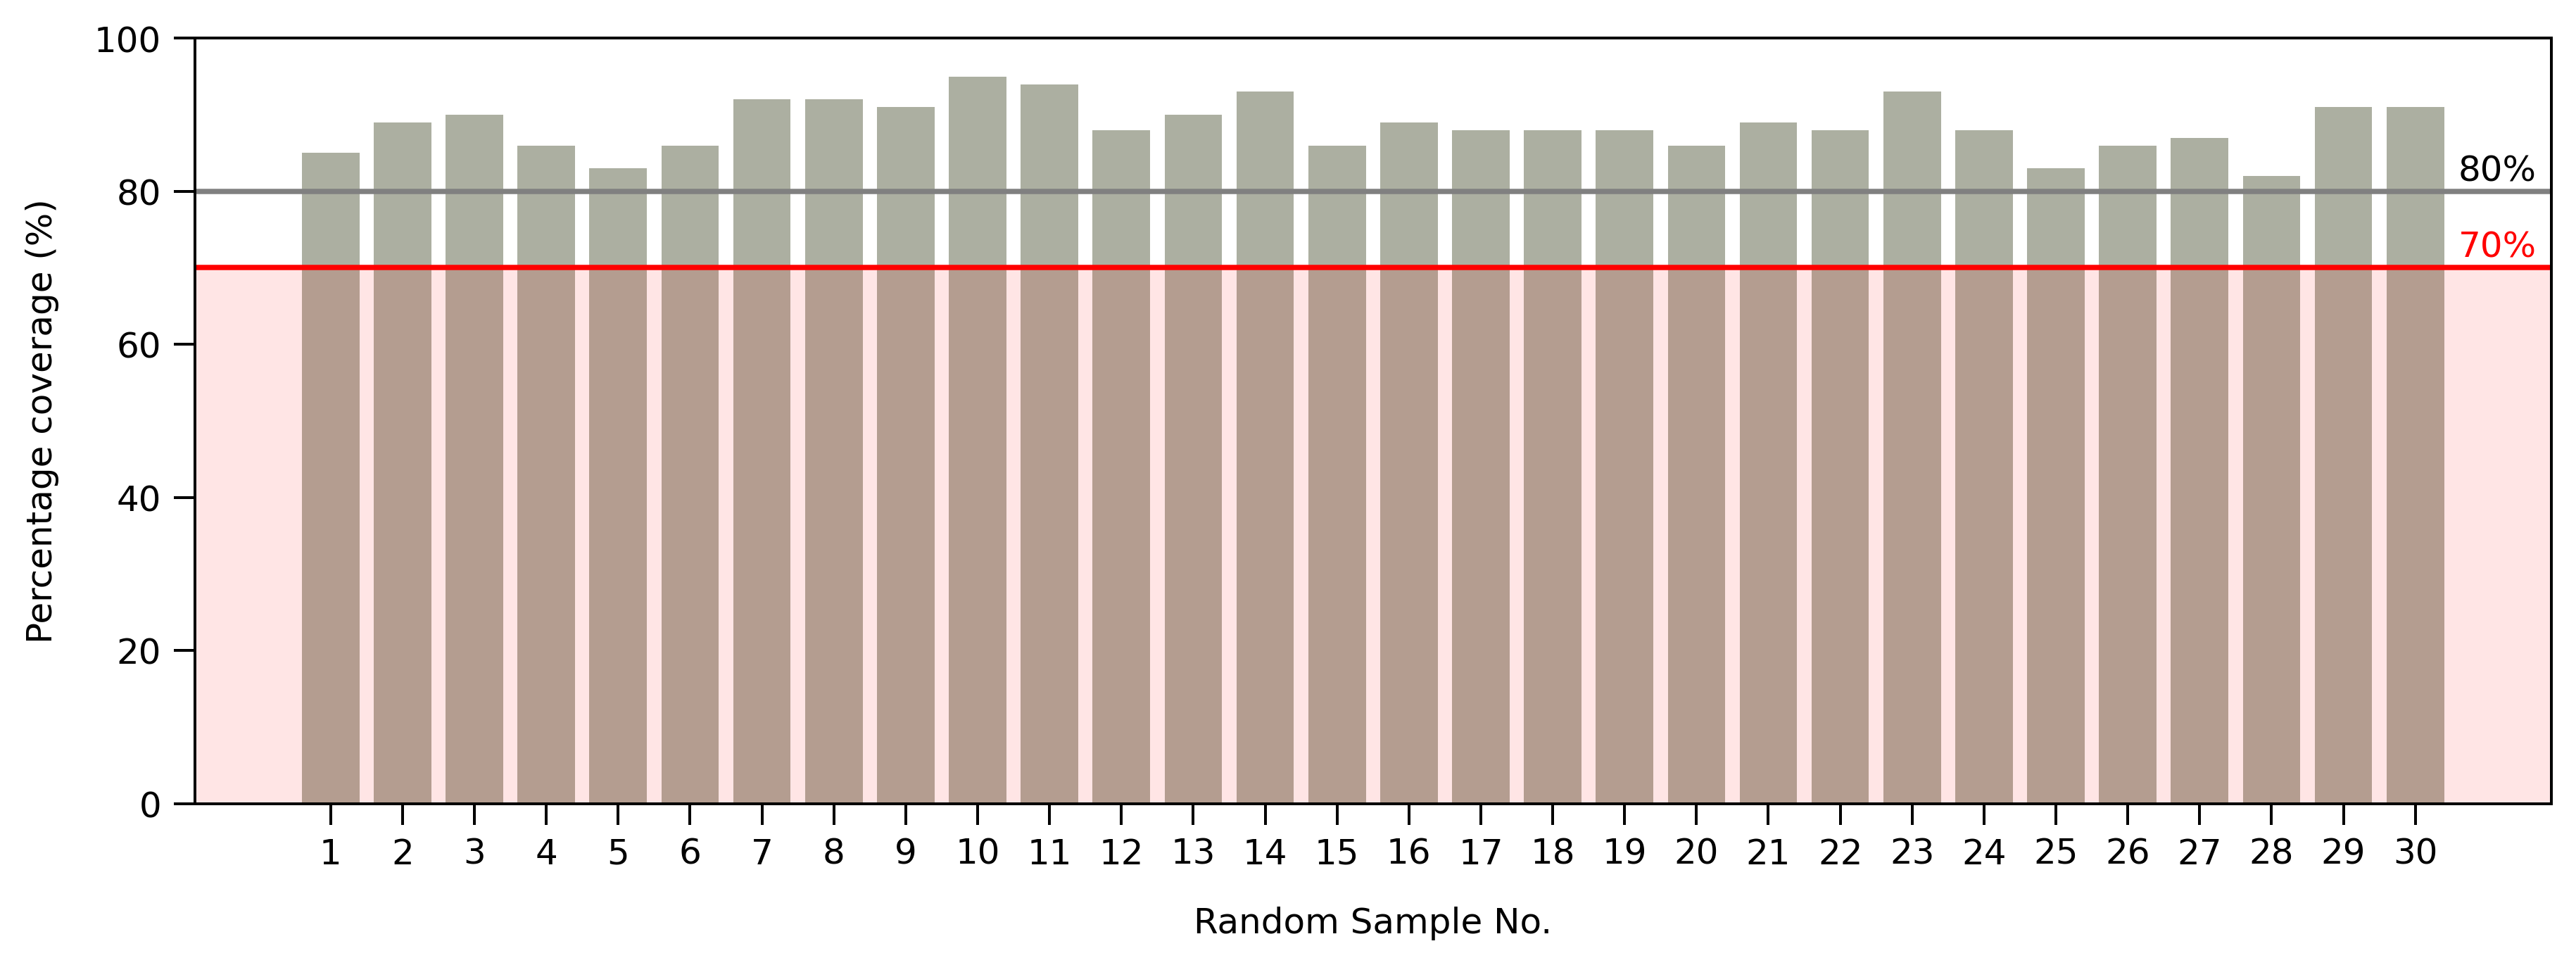

In [444]:
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(12, 4), dpi=360)
 
# creating the bar plot
plt.bar([str(x) for x in range(1, 31, 1)], coverages, color='#767b63', alpha=0.6, width = 0.8)
plt.axhline(y=70, color='red')
plt.axhline(y=80, color='gray')
plt.gca().add_patch(Rectangle((-2, 0), 33, 70, color='red', alpha=0.1))
plt.tick_params(size=6)
plt.text(29.6, 71.4, "70%", color='red')
plt.text(29.6, 81.4, "80%")
plt.ylim(0, 100) 
plt.xlabel("Random Sample No.", labelpad = 10)
plt.ylabel("Percentage coverage (%)", labelpad = 10)
plt.savefig('plots/ruleCoverage.png', bbox_inches='tight', dpi=600)
plt.show()

In [383]:
list(range(1, 31, 1))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

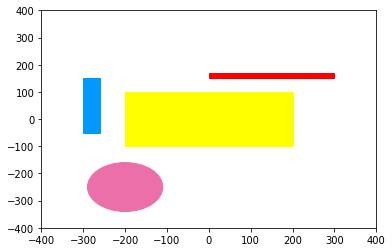

In [414]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
rect1 = matplotlib.patches.Rectangle((-200,-100), 400, 200, color='yellow')
rect2 = matplotlib.patches.Rectangle((0,150), 300, 20, color='red')
rect3 = matplotlib.patches.Rectangle((-300,-50), 40, 200, color='#0099FF')
circle1 = matplotlib.patches.Circle((-200,-250), radius=90, color='#EB70AA')
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(circle1)
plt.xlim([-400, 400])
plt.ylim([-400, 400])
plt.show()